In [1]:
import numpy as np
import pandas as pd

In [2]:
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow import keras
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('E:\T v\emails.csv')

In [4]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data1=data.drop_duplicates()

In [7]:
data.count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

In [8]:
data1.count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

In [11]:
data.drop(['Email No.'],axis=1,inplace=True)

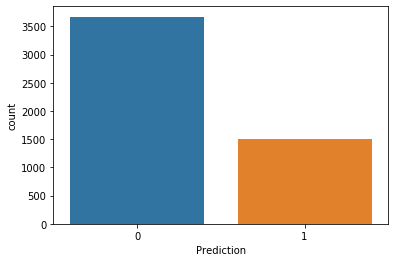

In [12]:
sns.countplot(x="Prediction",data=data1)

In [13]:
stop_words = set(stopwords.words("english"))

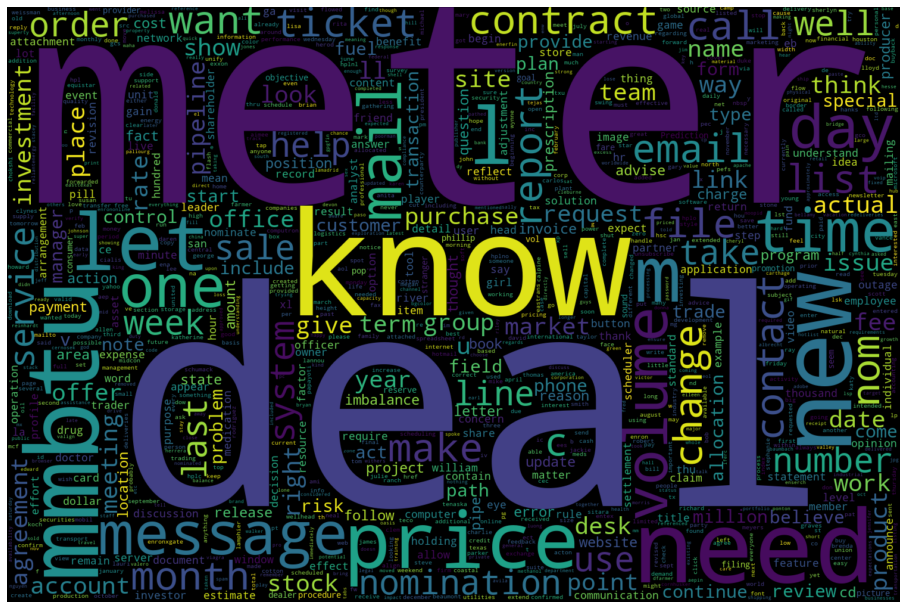

In [14]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=1000, width=1500, height=1000).generate(' '.join(data))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
X = data1.iloc[:, 1:-1].values
y = data1.iloc[:, -1].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Naive Bayes

In [62]:
mnb_model=MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [68]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       894
           1       0.95      0.86      0.90       399

    accuracy                           0.94      1293
   macro avg       0.94      0.92      0.93      1293
weighted avg       0.94      0.94      0.94      1293



C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class m

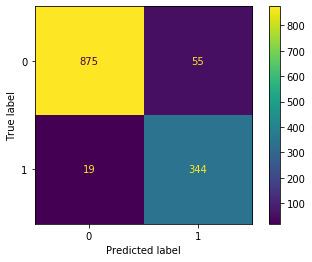

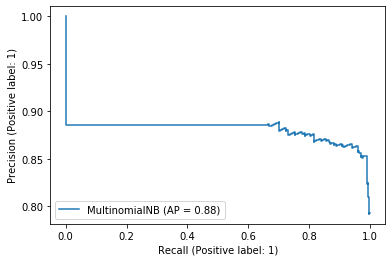

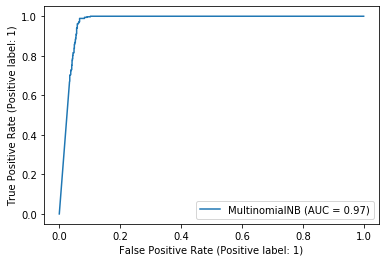

In [72]:
preds = mnb_model.predict(X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(mnb_model,X_test,y_test)
plot_precision_recall_curve(mnb_model,X_test,y_test)
plot_roc_curve(mnb_model,X_test,y_test)

# Logistic Regression

In [63]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       918
           1       0.97      0.94      0.95       375

    accuracy                           0.97      1293
   macro avg       0.97      0.96      0.97      1293
weighted avg       0.97      0.97      0.97      1293



C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class m

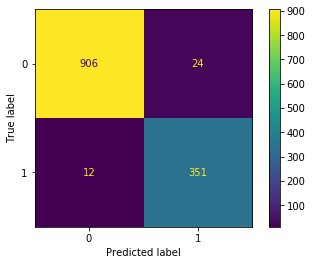

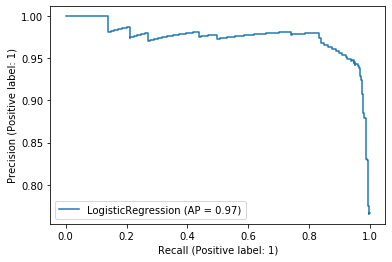

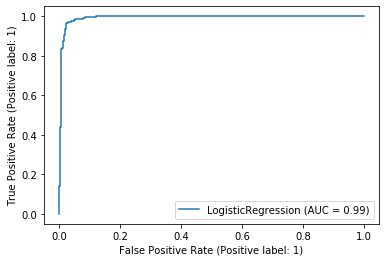

In [74]:
predl = lr_model.predict(X_test)
print(classification_report(predl,y_test))
plot_confusion_matrix(lr_model,X_test,y_test)
plot_precision_recall_curve(lr_model,X_test,y_test)
plot_roc_curve(lr_model,X_test,y_test)